# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Katia | Abdul Baki | Katia Abdul Baki, 2024-10-18 | 5 | 25% |
| Member 2: | Malay | Mistry | Malay Mistry, 2024-10-18 | 5 | 25% |
| Member 3: | Pratham | Rami | Pratham Rami, 2024-10-18 | 5 | 25% |
| Member 4: | Vasu | Shah | Vasu Shah, 2024-10-18 | 5 | 25% |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

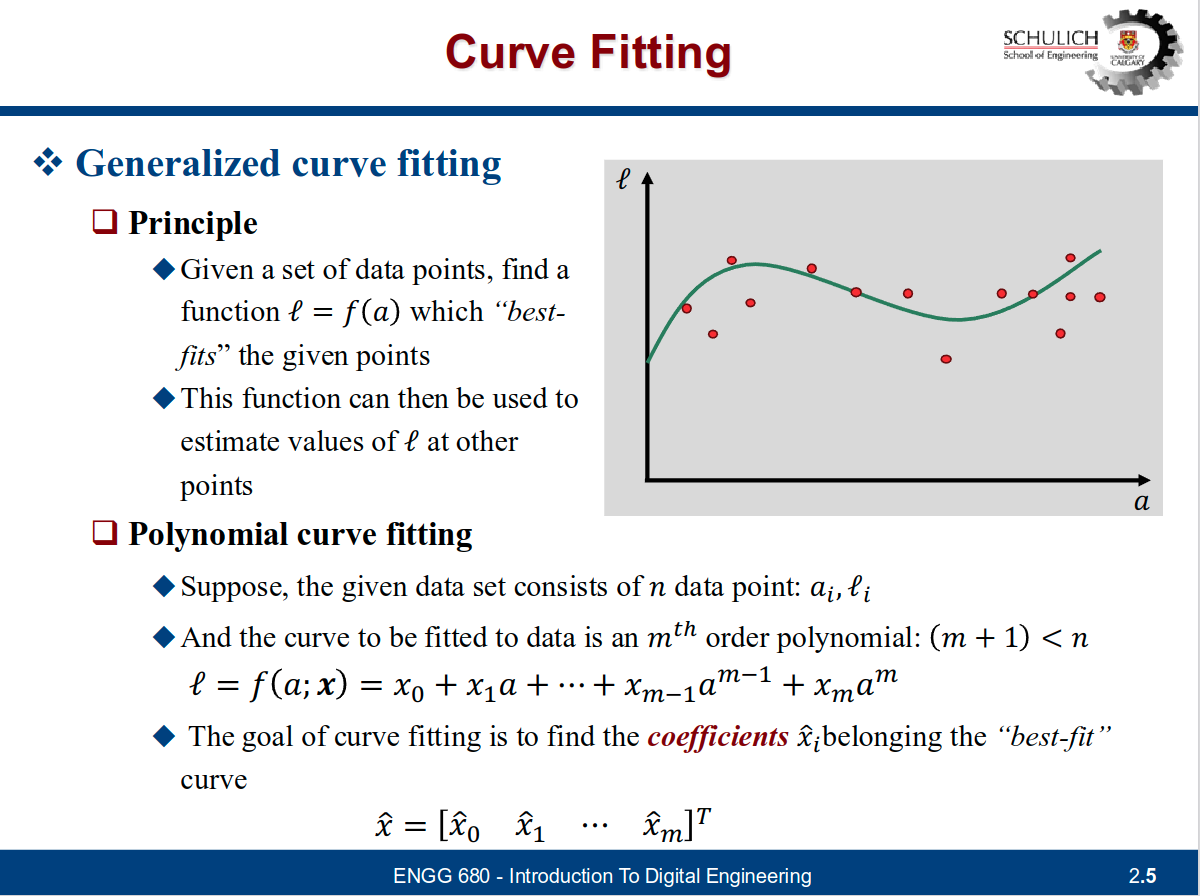

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [24]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
# Mounting google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
#Loading the data.xlsx file and converting to an array using numpy.
df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()
df_data.head()
#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]


In [27]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)
print(n)

500


In [28]:
# Step 3 continues
# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)

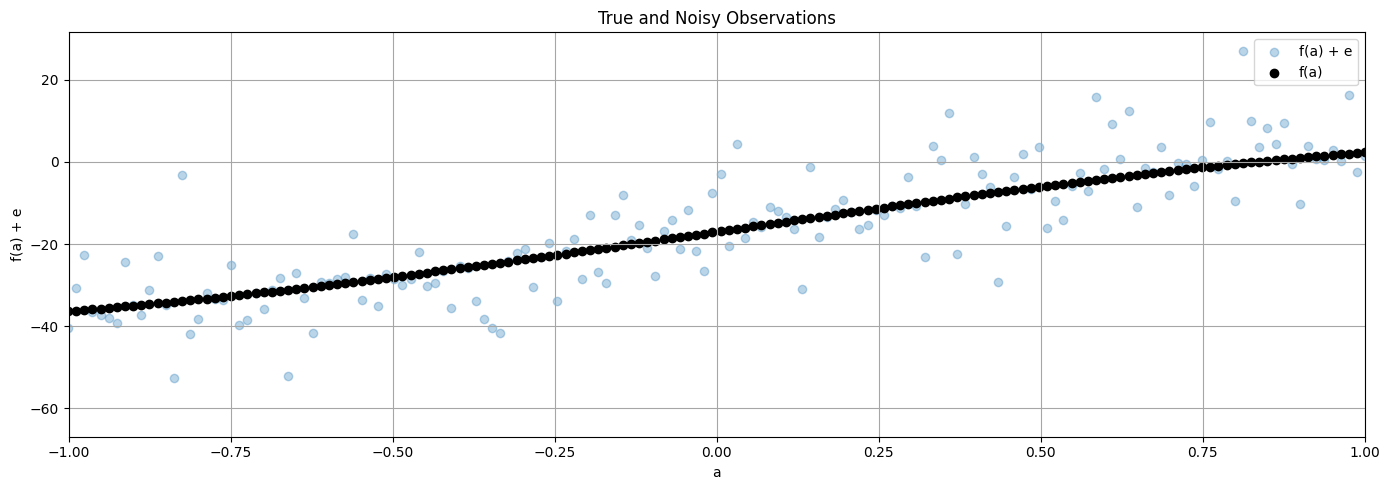

In [29]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
plt.scatter(a, l, color='tab:blue', marker='o', alpha=0.3, label='f(a) + e')
plt.scatter(a, l_true, color='k', label='f(a)')
plt.title('True and Noisy Observations')
plt.xlabel('a')
plt.ylabel('f(a) + e')
plt.legend(loc='upper right')
plt.xlim(-1,1)


ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [30]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:

    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    a = np.asarray(a).flatten()
    l = np.asarray(l).flatten()
    P = np.asarray(P)
    deg = 1
    n = len(l)

# Create matrix

    V = np.vander(a, deg +1, increasing=True)

    W = np.linalg.inv(P)
    V_w = W @ V
    l_w = W @ l
    x_w = np.linalg.solve(V_w.T @ V_w, V_w.T @ l_w)

    v= l - V @ x_w
    residual_sum_squares = np.sum(v**2)
    degrees_of_freedom = n - (deg +1)
    apv = 1 - (residual_sum_squares / degrees_of_freedom) / (np.sum(l**2) / n)

# Calculate covariance matrix
    cov_x = apv* np.linalg.inv(V_w.T @ V_w)
    return (x_w, cov_x, apv, v)

In [8]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
deg = [1,3,5]
results = {}
for d in deg:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, d)
    results[d] = (x, cov_x, apv, v)
print(f"\nDegree {deg}")
print("Coefficient:", results[d][0])
print("Covariance Matrix:", results[d][1])
print("A Posterier Variance Factor:", results[d][2])
print("Observation Residuals:", results[d][3])


Degree [1, 3, 5]
Coefficient: [-16.59352348   7.25633807]
Covariance Matrix: [[1.46760215e-03 5.05129643e-20]
 [5.05129643e-20 4.44316733e-04]]
A Posterier Variance Factor: 0.7338010761912064
Observation Residuals: [ 2.31950929e+01  2.33624696e+01  5.16650752e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401633e+00 -2.04342770e+00
  8.45600371e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688443e+00  1.29373203e+01  6.55314295e+00  5.69877998e+00
  1.01514943e+01  4.53954123e+00  1.48752086e+01  9.72183415e+00
  5.

In [9]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)
import numpy as np
a=np.array(a)
line_uw = np.polyval(np.atleast_1d(results[1][0]),a)
cubic_uw = np.polyval(np.atleast_1d(results[3][0]),a)
quintic_uw = np.polyval(np.atleast_1d(results[5][0]),a)


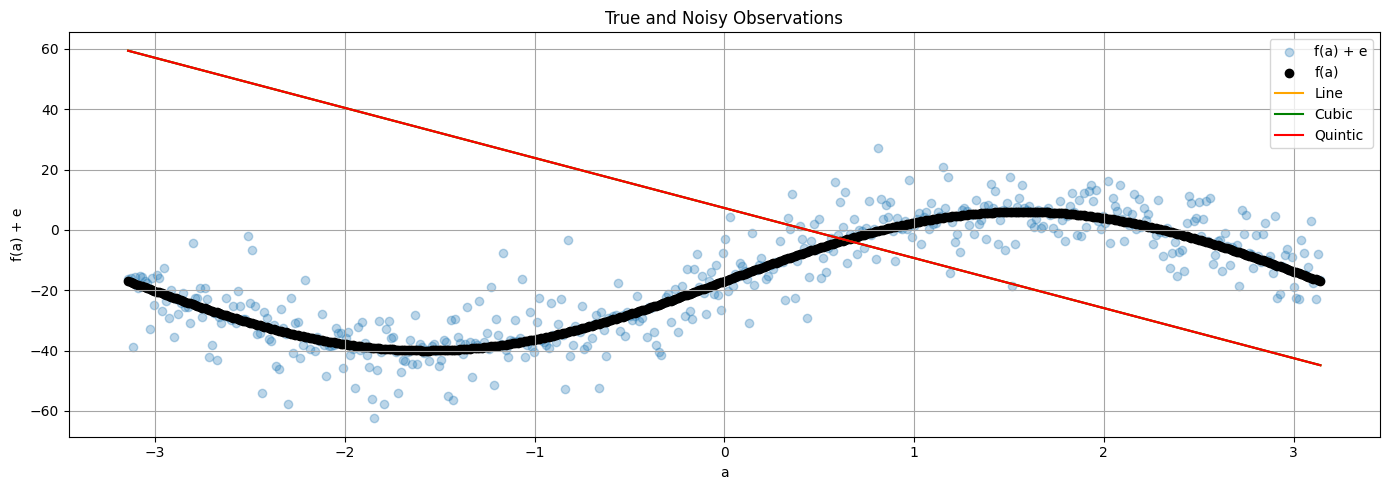

In [10]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

a_plot = np.linspace(a.min(), a.max(), len(l))
l = np.asarray(l).flatten()  # Convert l to a 1D array
l_true = np.asarray(l_true).flatten()  # Convert l_true to a 1D array

plt.scatter(a_plot, l, color='tab:blue', marker='o', alpha=0.3, label='f(a) + e')
plt.scatter(a_plot, l_true, color='k', label='f(a)')

line_uw = np.polyval(np.atleast_1d(results[1][0]),a_plot)
cubic_uw = np.polyval(np.atleast_1d(results[3][0]),a_plot)
quintic_uw = np.polyval(np.atleast_1d(results[5][0]),a_plot)

plt.plot(a_plot, line_uw, color='orange', label='Line')
plt.plot(a_plot, cubic_uw, color='green', label='Cubic')
plt.plot(a_plot, quintic_uw, color='red', label='Quintic')

# Add labels and title
plt.title('True and Noisy Observations')
plt.xlabel('a')
plt.ylabel('f(a) + e')
plt.legend(loc='upper right')


ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()
plt.show()

# NOT WORKING PROPERLY .... STILL NEED TO BE REVIEWED

In [12]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print("A Posterier Variance Factor for Line:", results[1][2])
print("A Posterier Variance Factor for Cubic:", results[3][2])
print("A Posterier Variance Factor for Quintic:", results[5][2])

A Posterier Variance Factor for Line: 0.7338010761912064
A Posterier Variance Factor for Cubic: 0.7338010761912064
A Posterier Variance Factor for Quintic: 0.7338010761912064


In [15]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
norm_deg1 = np.linalg.norm(results[1][3])
norm_deg3 = np.linalg.norm(results[3][3])
norm_deg5 = np.linalg.norm(results[5][3])
print("Norm for Line and True Observation:", norm_deg1)
print("Norm for Cubic and True Observation:", norm_deg3)
print("Norm for Quintic and True Observation:", norm_deg5)

Norm for Line and True Observation: 284.6854739619715
Norm for Cubic and True Observation: 284.6854739619715
Norm for Quintic and True Observation: 284.6854739619715


In [18]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# Here, the posterior variance factor is too small, and the norm is quite larger as compared to posterior variance which means that the data is leading to greater uncertainty.

In [23]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(1/l_var)
print(P)

[[0.02777778 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00694444 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00591716 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04       0.         0.        ]
 [0.         0.         0.         ... 0.         0.015625   0.        ]
 [0.         0.         0.         ... 0.         0.         0.25      ]]



Degree [1, 3, 5]
Coefficient: [-16.59352348   7.25633807]
Covariance Matrix: [[1.46760215e-03 5.05129643e-20]
 [5.05129643e-20 4.44316733e-04]]
A Posterier Variance Factor: 0.7338010761912064
Observation Residuals: [ 2.31950929e+01  2.33624696e+01  5.16650752e-01  2.33475847e+01
  1.96698387e+01  2.37681600e+01  2.33453696e+01  2.18331528e+01
  2.11355408e+01  5.61358715e+00  2.24756392e+01  1.33407067e+01
  2.34014210e+01  2.24034178e+01  1.13532794e+01  2.53650032e+01
  1.44202357e+01  8.52085442e+00  1.79247562e+01  2.11851700e+00
  1.46072683e+01  9.70673172e+00  1.30817824e+01  1.63166651e+01
  1.15688083e+01  1.16383392e+01  6.07754648e+00  3.24693889e+01
  1.42879391e+01  1.41679638e+01  1.73166729e+01  7.83535648e+00
  1.73215977e+01  1.35522578e+01 -5.87401633e+00 -2.04342770e+00
  8.45600371e+00 -7.17469845e+00  7.13670400e+00  4.93927812e+00
  7.53688443e+00  1.29373203e+01  6.55314295e+00  5.69877998e+00
  1.01514943e+01  4.53954123e+00  1.48752086e+01  9.72183415e+00
  5.

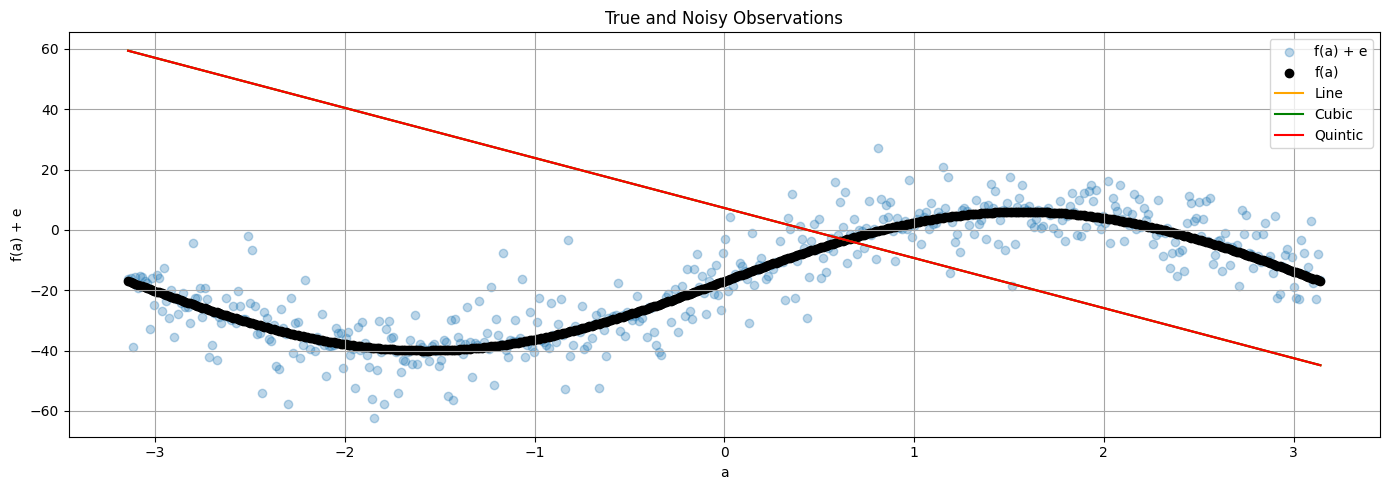

In [35]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
deg = [1,3,5]
results = {}
for d in deg:
    x_w, cov_x_w, apv_w, v_w = fit_polynomial_curve(a, l, P, d)
    results[d] = (x_w, cov_x_w, apv_w, v_w)
print(f"\nDegree {deg}")
print("Coefficient:", results[d][0])
print("Covariance Matrix:", results[d][1])
print("A Posterier Variance Factor:", results[d][2])
print("Observation Residuals:", results[d][3])

import numpy as np
a=np.array(a)
line_w = np.polyval(np.atleast_1d(results[1][0]),a)
cubic_w = np.polyval(np.atleast_1d(results[3][0]),a)
quintic_w = np.polyval(np.atleast_1d(results[5][0]),a)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
a_plot = np.linspace(a.min(), a.max(), len(l))
l = np.asarray(l).flatten()  # Convert l to a 1D array
l_true = np.asarray(l_true).flatten()  # Convert l_true to a 1D array
plt.scatter(a_plot, l, color='tab:blue', marker='o', alpha=0.3, label='f(a) + e')
plt.scatter(a_plot, l_true, color='k', label='f(a)')
line_w = np.polyval(np.atleast_1d(results[1][0]),a_plot)
cubic_w = np.polyval(np.atleast_1d(results[3][0]),a_plot)
quintic_w = np.polyval(np.atleast_1d(results[5][0]),a_plot)
plt.plot(a_plot, line_w, color='orange', label='Line')
plt.plot(a_plot, cubic_w, color='green', label='Cubic')
plt.plot(a_plot, quintic_w, color='red', label='Quintic')
plt.title('True and Noisy Observations')
plt.xlabel('a')
plt.ylabel('f(a) + e')
plt.legend(loc='upper right')
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()
plt.show()

print("A Posterier Variance Factor for Line (Weighted):", results[1][2])
print("A Posterier Variance Factor for Cubic (Weighted):", results[3][2])
print("A Posterier Variance Factor for Quintic (Weighted):", results[5][2])

norm_deg1 = np.linalg.norm(results[1][3])
norm_deg3 = np.linalg.norm(results[3][3])
norm_deg5 = np.linalg.norm(results[5][3])
print("Norm for Line and True Observation:", norm_deg1)
print("Norm for Cubic and True Observation:", norm_deg3)
print("Norm for Quintic and True Observation:", norm_deg5)

In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

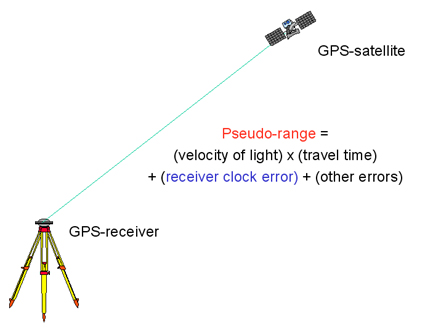

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [60]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
import numpy as np
import pandas as pd
df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [61]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = 4
print("Number of measurements (n):", n)
print("Number of states (m):", m)

Number of measurements (n): 11
Number of states (m): 4


In [62]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)
print("Weight Matrix (P):")
print(P)

Weight Matrix (P):
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [63]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)
print("Initial States (x_0):")
print(x_0)

Initial States (x_0):
[0. 0. 0. 0.]


In [64]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [65]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [66]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
    diff = satellite_pos - receiver_pos
    distance = np.sqrt(np.sum(diff**2, axis=1))
    return distance

In [67]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    num_satellites = s_pos.shape[0]
    A = np.zeros((num_satellites, 4))
    for i in range(num_satellites):
      diff = s_pos[i] - r_pos
      A[i, 0] = diff[0]
      A[i, 1] = diff[1]
      A[i, 2] = diff[2]
      A[i, 3] = rho[i]
    return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!